## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [32]:
import pandas
from pandas import to_datetime, to_numeric
import matplotlib.pyplot as plt


## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [33]:
df= pandas.read_csv('queryresults.csv', names= ['DATE', 'TAG', 'POSTS'], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [34]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,504
4,2008-08-01 00:00:00,c++,164


In [35]:
df.tail()

,DATE,TAG,POSTS
2561,2023-12-01 00:00:00,php,1227
2562,2023-12-01 00:00:00,python,7138
2563,2023-12-01 00:00:00,r,1617
2564,2023-12-01 00:00:00,ruby,157
2565,2023-12-01 00:00:00,swift,758


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [36]:
df.shape

(2566, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [37]:
df.count()

DATE     2566
TAG      2566
POSTS    2566
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [38]:
df.groupby('TAG').sum()

,DATE,POSTS
TAG,,
assembly,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,43778
c,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,401708
c#,2008-07-01 00:00:002008-08-01 00:00:002008-09-...,1608071
c++,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,802487
delphi,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,51570
go,2009-11-01 00:00:002009-12-01 00:00:002010-01-...,71843
java,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1910485
javascript,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,2517619
perl,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,67991


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [50]:
df.count()

DATE     2566
TAG      2566
POSTS    2566
dtype: int64

In [51]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,185,185
c,185,185
c#,186,186
c++,185,185
delphi,185,185
go,170,170
java,185,185
javascript,185,185
perl,185,185


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [41]:
df['DATE'][1]

'2008-08-01 00:00:00'

In [42]:
type(df['DATE'][1])

str

In [48]:
df["DATE"] = pandas.to_datetime(df['DATE']) 
# df["DATE"]= df["DATE"].dt.strftime('%Y-%m-%d')
type(df.DATE[1])


pandas._libs.tslibs.timestamps.Timestamp

In [52]:
test_df = pandas.DataFrame({'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old', 'Old'],
                        'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu', 'Sylvester'],
                        'Power': [100, 80, 25, 50, 99, 75, 5, 30]})
test_df

pivoted_df = test_df.pivot(index='Age', columns='Actor', values='Power')
pivoted_df

Actor,Arnold,Jack,Keanu,Sylvester
Age,,,,
Old,75,99,5,30
Young,80,100,25,50


## Data Manipulation



In [55]:
reshaped_df = df.pivot(index='DATE',columns='TAG', values='POSTS')
#Alternatively instead of margins=True
reshaped_df.fillna(0, inplace=True)  
def format_value(value):
    return f'{value:.1f}'
 
reshaped_df=reshaped_df.applymap(format_value)
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,504.0,164.0,14.0,0.0,222.0,163.0,28.0,157.0,119.0,0.0,70.0,0.0
2008-09-01,28.0,320.0,1639.0,755.0,104.0,0.0,1129.0,634.0,130.0,475.0,537.0,6.0,286.0,0.0
2008-10-01,16.0,303.0,1987.0,807.0,112.0,0.0,1149.0,722.0,128.0,608.0,506.0,0.0,247.0,0.0
2008-11-01,16.0,258.0,1730.0,734.0,140.0,0.0,954.0,580.0,97.0,499.0,448.0,1.0,157.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,143.0,859.0,3644.0,1668.0,106.0,492.0,3823.0,6759.0,49.0,1764.0,10218.0,2358.0,201.0,971.0
2023-09-01,157.0,873.0,3052.0,1492.0,105.0,424.0,3333.0,5702.0,61.0,1667.0,8625.0,2038.0,192.0,862.0
2023-10-01,175.0,975.0,3202.0,1724.0,165.0,423.0,3448.0,5505.0,53.0,1547.0,9055.0,2067.0,196.0,905.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [56]:
reshaped_df.shape

(186, 14)

In [57]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [58]:
reshaped_df.head()


TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,504.0,164.0,14.0,0.0,222.0,163.0,28.0,157.0,119.0,0.0,70.0,0.0
2008-09-01,28.0,320.0,1639.0,755.0,104.0,0.0,1129.0,634.0,130.0,475.0,537.0,6.0,286.0,0.0
2008-10-01,16.0,303.0,1987.0,807.0,112.0,0.0,1149.0,722.0,128.0,608.0,506.0,0.0,247.0,0.0
2008-11-01,16.0,258.0,1730.0,734.0,140.0,0.0,954.0,580.0,97.0,499.0,448.0,1.0,157.0,0.0


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [59]:
reshaped_df.count()

TAG
assembly      186
c             186
c#            186
c++           186
delphi        186
go            186
java          186
javascript    186
perl          186
php           186
python        186
r             186
ruby          186
swift         186
dtype: int64

In [60]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,504.0,164.0,14.0,0.0,222.0,163.0,28.0,157.0,119.0,0.0,70.0,0.0
2008-09-01,28.0,320.0,1639.0,755.0,104.0,0.0,1129.0,634.0,130.0,475.0,537.0,6.0,286.0,0.0
2008-10-01,16.0,303.0,1987.0,807.0,112.0,0.0,1149.0,722.0,128.0,608.0,506.0,0.0,247.0,0.0
2008-11-01,16.0,258.0,1730.0,734.0,140.0,0.0,954.0,580.0,97.0,499.0,448.0,1.0,157.0,0.0


In [61]:
grouped_data = df.groupby(['TAG'])['POSTS'].sum()

grouped_data



TAG
assembly        43778
c              401708
c#            1608071
c++            802487
delphi          51570
go              71843
java          1910485
javascript    2517619
perl            67991
php           1461534
python        2172857
r              501086
ruby           228692
swift          331508
Name: POSTS, dtype: int64

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

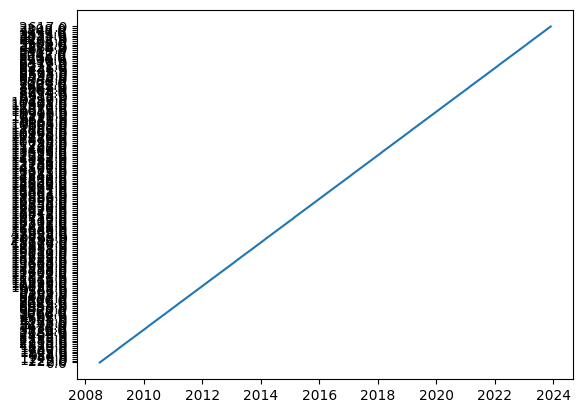

In [63]:
# reshaped_df['DATE'] = pandas.to_datetime(reshaped_df['DATE'])

# reshaped_df['java'] = pandas.to_numeric(reshaped_df['java'])

# plt.figure(figsize=(16,10)) 
# plt.xlabel('Date', fontsize=15)
# plt.ylabel('Posts', fontsize=15)
# plt.ylim(0, 35000)

plt.plot(reshaped_df.index, reshaped_df.java)
# reshaped_df.head()

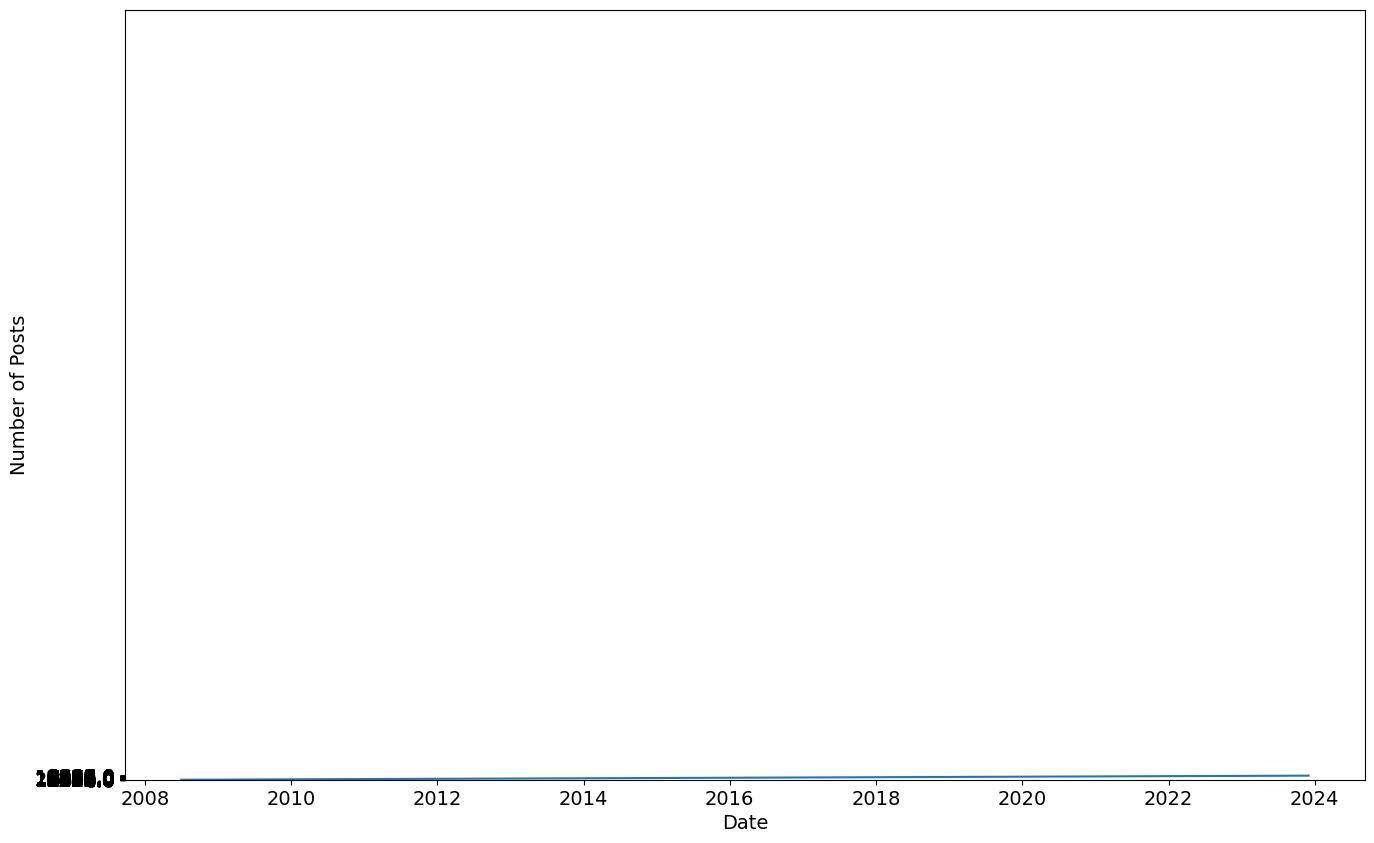

In [64]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df.java)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

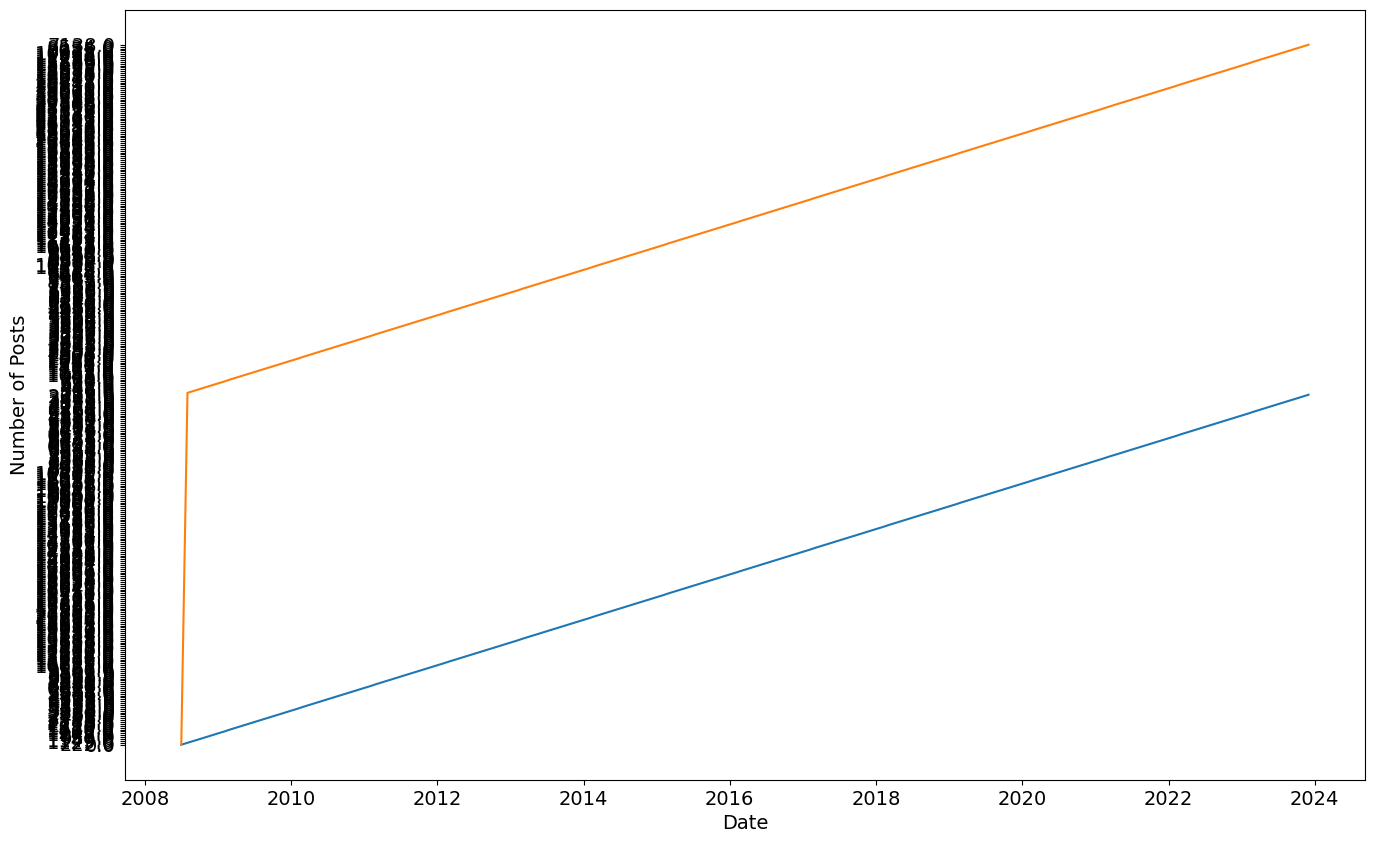

In [66]:
plt.figure(figsize=(16,10)) # make chart larger
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)

plt.plot(reshaped_df.index, reshaped_df.java)
plt.plot(reshaped_df.index, reshaped_df.python)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 